In [ ]:
import pandas as pd
import gymnasium as gym
import numpy as np

from dist_plot import plot_q_values_map
from dist_q import EpsilonGreedy
from dist_run import Params, run_env_qlearning, postprocess

In [4]:
params = Params(
    total_episodes=2000,
    learning_rate=0.8,
    gamma=0.95,
    epsilon=0.1,
    map_size=(4, 12),
    seed=123,
    is_slippery=True,
    n_runs=20,
    action_size=None,
    state_size=None,
    n_quantiles=51,
)

rng = np.random.default_rng(params.seed)

In [5]:
res_all = pd.DataFrame()
st_all = pd.DataFrame()

env = gym.make(
    "CliffWalking-v1",
    is_slippery=params.is_slippery,
    shape=params.map_size,
    render_mode="rgb_array",
)
params = params._replace(action_size=env.action_space.n)
params = params._replace(state_size=env.observation_space.n)
env.action_space.seed(params.seed)

explorer = EpsilonGreedy(params.epsilon, rng)
rewards, steps, episodes, qtables, all_states, all_actions = run_env_qlearning(env, explorer, params)

# Save the results in dataframes
res, st = postprocess(episodes, params, rewards, steps)
res_all = pd.concat([res_all, res])
st_all = pd.concat([st_all, st])
qtable = qtables.mean(axis=0)  # Average the Q-table between runs

env.close()

In [10]:
for i, pos in enumerate([(3, 0), (2, 0), (2, 10), (2, 11)]):
    state = np.ravel_multi_index(pos, params.map_size)
    print(f"action: {i} | q_value : {qtable[state]}")

action: 0 | q_value : [-58.88418159 -48.97341302 -66.73605497 -18.76091516]
action: 1 | q_value : [-18.65253512 -18.83198274 -18.95444802 -18.89050075]
action: 2 | q_value : [ -0.75083082 -63.21795279 -77.29121331 -72.47814168]
action: 3 | q_value : [-2.94175472  4.53766207 -0.03066587 -2.20327507]


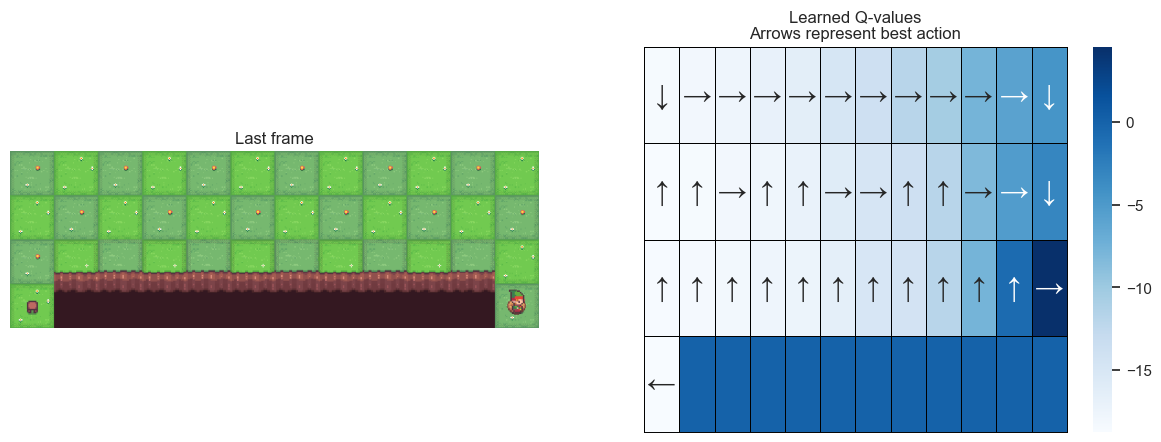

In [7]:
plot_q_values_map(qtable, env, params.map_size)